In [1]:
# 데이터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


food = pd.read_csv('/Users/parkchangyu/Desktop/수업 자료/2023년 2학기/통데분/통데분 과제 /팀플/2023-SDA/datasets/Food_Supply_kcal_Data.csv')
life = pd.read_csv('/Users/parkchangyu/Desktop/수업 자료/2023년 2학기/통데분/통데분 과제 /팀플/2023-SDA/datasets/healthy_lifestyle_city_2021 2.csv')

#food
#life

In [2]:
## food 전처리 ##
food['Undernourished'] = food['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')
food = food.drop('Unit (all except Population)', axis=1)
food = food.dropna()

# 결측값 유무 확인
#food.isnull().sum()

In [3]:
## life 전처리 ##
col_name = {
    'City': 'Country',
    'Rank': 'Rank',
    'Sunshine hours(City)': 'Sunshine hours',
    'Cost of a bottle of water(City)': 'Cost of a bottle of water',
    'Obesity levels(Country)': 'Obesity levels',
    'Life expectancy(years) (Country)': 'Life expectancy(years)',
    'Pollution(Index score) (City)': 'Pollution(Index score)',
    'Annual avg. hours worked': 'Annual avg. hours worked',
    'Happiness levels(Country)': 'Happiness levels',
    'Outdoor activities(City)': 'Outdoor activities',
    'Number of take out places(City)': 'Number of take out places',
    'Cost of a monthly gym membership(City)': 'Cost of a monthly gym membership'
}
life.rename(columns=col_name, inplace=True)

# 결측치 정제 (결측치들 평균 값으로 대체)
life['Sunshine hours'] = life['Sunshine hours'].replace('-', pd.NA)
life['Sunshine hours'] = pd.to_numeric(life['Sunshine hours'], errors='coerce')
mean_Sunshine_hours = life['Sunshine hours'].mean()
life['Sunshine hours'].fillna(mean_Sunshine_hours, inplace=True)
#life['Sunshine hours']

life['Pollution(Index score)'] = life['Pollution(Index score)'].replace('-', pd.NA)
life['Pollution(Index score)'] = pd.to_numeric(life['Pollution(Index score)'], errors='coerce')
mean_Pollution = life['Pollution(Index score)'].mean()
life['Pollution(Index score)'].fillna(mean_Pollution, inplace=True)
#life['Pollution(Index score)']

life['Annual avg. hours worked'] = life['Annual avg. hours worked'].replace('-', pd.NA)
life['Annual avg. hours worked'] = pd.to_numeric(life['Annual avg. hours worked'], errors='coerce')
mean_worked = life['Annual avg. hours worked'].mean()
life['Annual avg. hours worked'].fillna(mean_worked, inplace=True)
#life['Annual avg. hours worked']

# 단위 기호 빼기
life['Obesity levels'] = life['Obesity levels'].astype(str)
life['Obesity levels'] = life['Obesity levels'].str.rstrip('%').astype('float')
#print(life['Obesity levels'])


life['Cost of a bottle of water'] = life['Cost of a bottle of water'].astype(str)
life['Cost of a bottle of water'] = life['Cost of a bottle of water'].str.replace('£', '').astype('float')
#print(life['Cost of a bottle of water'])

life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].astype(str)
life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].str.replace('£', '').astype('float')
#print(life['Cost of a monthly gym membership'])

# city -> country
country_mapping = {
    'Amsterdam': 'Netherlands',
    'Sydney': 'Australia',
    'Vienna': 'Austria',
    'Stockholm': 'Sweden',
    'Copenhagen': 'Denmark',
    'Helsinki': 'Finland',
    'Fukuoka': 'Japan',
    'Berlin': 'Germany',
    'Barcelona': 'Spain',
    'Vancouver': 'Canada',
    'Melbourne': 'Australia',
    'Beijing': 'China',
    'Bangkok': 'Thailand',
    'Buenos Aires': 'Argentina',
    'Toronto': 'Canada',
    'Madrid': 'Spain',
    'Jakarta': 'Indonesia',
    'Seoul': 'South Korea',
    'Frankfurt': 'Germany',
    'Geneva': 'Switzerland',
    'Tel Aviv': 'Israel',
    'Istanbul': 'Turkey',
    'Cairo': 'Egypt',
    'Taipei': 'Taiwan',
    'Los Angeles': 'United States',
    'Mumbai': 'India',
    'Boston': 'United States',
    'Dublin': 'Ireland',
    'Tokyo': 'Japan',
    'Chicago': 'United States',
    'Hong Kong': 'Hong Kong',
    'Shanghai': 'China',
    'Brussels': 'Belgium',
    'San Francisco': 'United States',
    'Paris': 'France',
    'Sao Paulo': 'Brazil',
    'Zurich': 'Switzerland',
    'London': 'United Kingdom',
    'Johannesburg': 'South Africa',
    'Milan': 'Italy',
    'Washington, D.C.': 'United States',
    'New York': 'United States',
    'Moscow': 'Russia',
    'Mexico City': 'Mexico'
}
life['Country'] = life['Country'].replace(country_mapping)

In [4]:
# 전처리한 food 확인하기
food

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,45.3184,4.2741,0.3525,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,34.9900,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,42.7586,7.5417,0.6674,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,39.0364,1.3279,1.9578,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,46.5455,3.9515,0.3636,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,46.7081,3.0062,0.4472,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0


In [5]:
# 전처리한 life 확인하기
life

,Country,Rank,Sunshine hours,Cost of a bottle of water,Obesity levels,Life expectancy(years),Pollution(Index score),Annual avg. hours worked,Happiness levels,Outdoor activities,Number of take out places,Cost of a monthly gym membership
0,Netherlands,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90
1,Australia,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66
2,Austria,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74
3,Sweden,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31
4,Denmark,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53
5,Finland,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23
6,Japan,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87
7,Germany,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11
8,Spain,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80
9,Canada,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04


In [6]:
#Country = life['Country']  # 'Country' 열 추출
life.drop('Country', axis=1, inplace=True)  # 'Country' 열 삭제
#life.drop('Rank', axis=1, inplace=True)  # 'Country' 열 삭제
#col = life.columns
#life = pd.DataFrame(life, columns=col)  # 업데이트된 DataFrame 생성
#life['Country'] = Country  # 'Country' 열을 DataFrame에 추가
#
life.info()  # DataFrame 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              44 non-null     int64  
 1   Sunshine hours                    44 non-null     float64
 2   Cost of a bottle of water         44 non-null     float64
 3   Obesity levels                    44 non-null     float64
 4   Life expectancy(years)            44 non-null     float64
 5   Pollution(Index score)            44 non-null     float64
 6   Annual avg. hours worked          44 non-null     float64
 7   Happiness levels                  44 non-null     float64
 8   Outdoor activities                44 non-null     int64  
 9   Number of take out places         44 non-null     int64  
 10  Cost of a monthly gym membership  44 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 3.9 KB


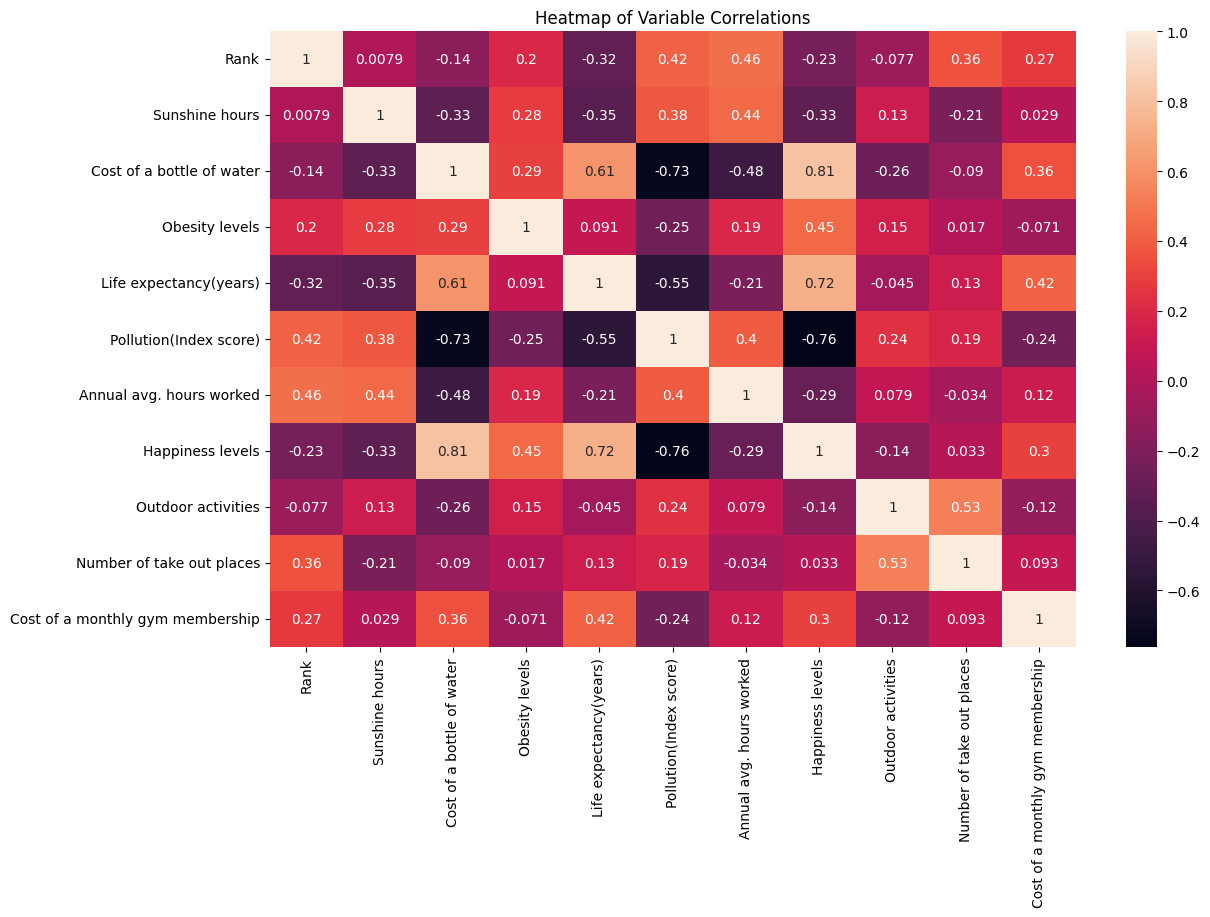

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,8))
sns.heatmap(life.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Sunshine hours): Statistic=0.9439, p-value=0.03266043588519096375
Levene 등분산성 검정 결과 (Sunshine hours): Statistic=117.6430, p-value=0.00000000000000000893
Fligner 등분산성 검정 결과 (Sunshine hours): Statistic=55.5181, p-value=0.00000000000009260019
Spearman 검정 결과 (Sunshine hours): 상관계수=-0.3316, p-value=0.02786585129556738011


정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9534, p-value=0.07345357537269592285
Levene 등분산성 검정 결과 (Cost of a bottle of water): Statistic=2.2526, p-value=0.13704853205147365935
Fligner 등분산성 검정 결과 (Cost of a bottle of water): Statistic=1.0598, p-value=0.30326166871322102203
Spearman 검정 결과 (Cost of a bottle of water): 상관계수=0.8242, p-value=0.00000000000621643408


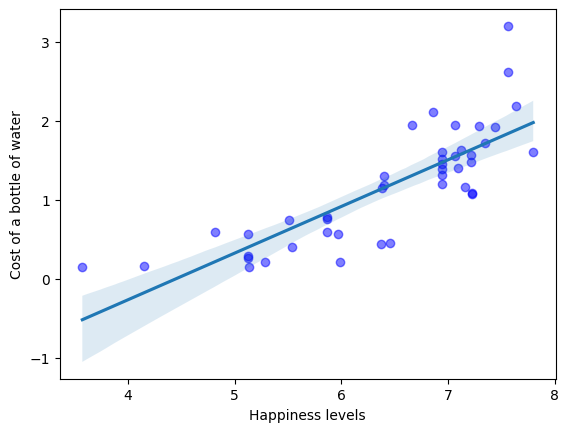



정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Obesity levels): Statistic=0.9035, p-value=0.00140059425029903650
Levene 등분산성 검정 결과 (Obesity levels): Statistic=54.0894, p-value=0.00000000010484684202
Fligner 등분산성 검정 결과 (Obesity levels): Statistic=34.7233, p-value=0.00000000380053059957
Spearman 검정 결과 (Obesity levels): 상관계수=0.2591, p-value=0.08949360359364863515


정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Life expectancy(years)): Statistic=0.7850, p-value=0.00000140098029532965
Levene 등분산성 검정 결과 (Life expectancy(years)): Statistic=16.0644, p-value=0.00012985288526244973
Fligner 등분산성 검정 결과 (Life expectancy(years)): Statistic=21.6059, p-value=0.00000334828816850522
Spearman 검정 결과 (Life expectancy(years)): 상관계수=0.5725, p-value=0.00004893824159814498


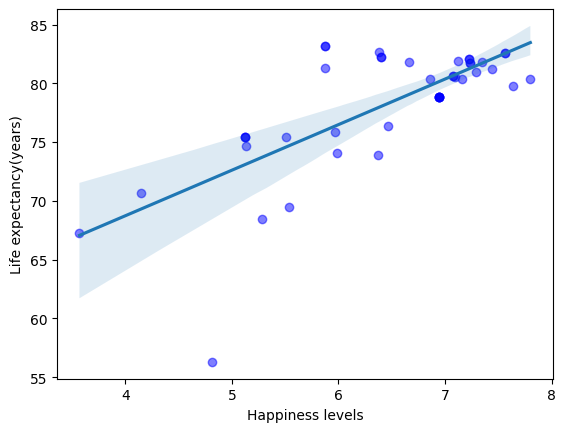



정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Pollution(Index score)): Statistic=0.9667, p-value=0.23032510280609130859
Levene 등분산성 검정 결과 (Pollution(Index score)): Statistic=99.8831, p-value=0.00000000000000046802
Fligner 등분산성 검정 결과 (Pollution(Index score)): Statistic=51.0477, p-value=0.00000000000090146762
Spearman 검정 결과 (Pollution(Index score)): 상관계수=-0.8232, p-value=0.00000000000692489846


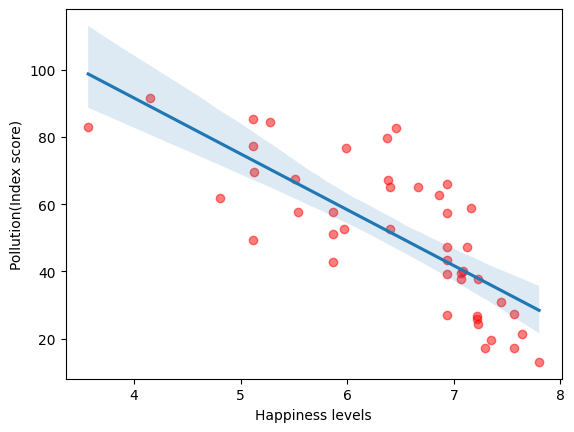



정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Annual avg. hours worked): Statistic=0.9408, p-value=0.02517922781407833099
Levene 등분산성 검정 결과 (Annual avg. hours worked): Statistic=38.1343, p-value=0.00000002114928478723
Fligner 등분산성 검정 결과 (Annual avg. hours worked): Statistic=21.5377, p-value=0.00000346936358771336
Spearman 검정 결과 (Annual avg. hours worked): 상관계수=-0.3647, p-value=0.01494615147438047888


정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Outdoor activities): Statistic=0.9444, p-value=0.03410947322845458984
Levene 등분산성 검정 결과 (Outdoor activities): Statistic=63.7182, p-value=0.00000000000574288215
Fligner 등분산성 검정 결과 (Outdoor activities): Statistic=55.1263, p-value=0.00000000000011302684
Spearman 검정 결과 (Outdoor activities): 상관계수=-0.1665, p-value=0.28006259470755312524


정규성 검정 결과 (Happiness levels): Statistic=0.9092, p-value=0.00211808481253683567
정규성 검정 결과 (Number of take out places): Statis

In [14]:
# 필요한 라이브러리 불러오기
from scipy.stats import shapiro, levene, spearmanr, pearsonr, fligner
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 비교할 열들과 종속 변수 선택
cols = ['Sunshine hours', 'Cost of a bottle of water', 'Obesity levels', 'Life expectancy(years)',
        'Pollution(Index score)', 'Annual avg. hours worked',
        'Outdoor activities', 'Number of take out places', 'Cost of a monthly gym membership']
dependent_variable = 'Happiness levels'

# 각 열에 대해 분석 수행
for col in cols:
    # 데이터 추출
    a = life[dependent_variable]
    b = life[col]
    
    # 정규성 검정 - Shapiro-Wilk test
    stat_a, p_a = shapiro(a)
    stat_b, p_b = shapiro(b)

    print(f'정규성 검정 결과 ({dependent_variable}): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
    print(f'정규성 검정 결과 ({col}): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

    # 등분산성 검정 - Levene
    stat_levene, p_value_levene = levene(a, b)
    print(f'Levene 등분산성 검정 결과 ({col}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 등분산성 검정 - Fligner
    stat_fligner, p_value_fligner = fligner(a, b)
    print(f'Fligner 등분산성 검정 결과 ({col}): Statistic={stat_fligner:.4f}, p-value={p_value_fligner:.20f}')

    # 스피어만 검정 또는 피어슨 검정 선택
    if p_a < 0.05 or p_b < 0.05 or stat_levene < 0.05 or stat_fligner < 0.05:
        # 정규성 또는 등분산성 가정이 깨질 경우 스피어만 검정 수행
        correlation, p_value = spearmanr(a, b)
        print(f'Spearman 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')
    else:
        # 가정이 만족할 경우 피어슨 검정 수행
        correlation, p_value = pearsonr(a, b)
        print(f'Pearson 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')

    # 절대값이 0.3보다 클 경우 스캐터플롯 출력
    if abs(correlation) > 0.5:
        sns.regplot(x=a, y=b, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(dependent_variable)
        plt.ylabel(col)
        plt.show()

    print("\n")


In [15]:
from scipy.stats import shapiro, levene, spearmanr, pearsonr, fligner
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

cols = ['Sunshine hours', 'Cost of a bottle of water', 'Life expectancy(years)',
        'Pollution(Index score)', 'Annual avg. hours worked', 'Happiness levels',
        'Outdoor activities', 'Number of take out places', 'Cost of a monthly gym membership']

dependent_variable = 'Obesity levels'

for col in cols:
    # 데이터 추출
    a = life[dependent_variable]
    b = life[col]
    
    # 정규성 검정
    stat_a, p_a = shapiro(a)
    stat_b, p_b = shapiro(b)

    print(f'정규성 검정 결과 ({dependent_variable}): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
    print(f'정규성 검정 결과 ({col}): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

    # 등분산성 검정 - Levene
    stat_levene, p_value_levene = levene(a, b)
    print(f'Levene 등분산성 검정 결과 ({col}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 등분산성 검정 - Fligner
    stat_fligner, p_value_fligner = fligner(a, b)
    print(f'Fligner 등분산성 검정 결과 ({col}): Statistic={stat_fligner:.4f}, p-value={p_value_fligner:.20f}')

    # 스피어만 검정 또는 피어슨 검정 선택
    if p_a < 0.05 or p_b < 0.05 or stat_levene < 0.05 or stat_fligner < 0.05:  # 정규성 또는 등분산성 가정이 깨질 경우 스피어만 검정 수행
        correlation, p_value = spearmanr(a, b)
        print(f'Spearman 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')
    else:
        correlation, p_value = pearsonr(a, b)
        print(f'Pearson 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')

    # 절대값이 0.5보다 클 경우 스캐터플롯 출력
    if abs(correlation) > 0.5:
        sns.regplot(x=a, y=b, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(dependent_variable)
        plt.ylabel(col)
        plt.show()

    print("\n")

정규성 검정 결과 (Obesity levels): Statistic=0.9035, p-value=0.00140059425029903650
정규성 검정 결과 (Sunshine hours): Statistic=0.9439, p-value=0.03266043588519096375
Levene 등분산성 검정 결과 (Sunshine hours): Statistic=114.1480, p-value=0.00000000000000001893
Fligner 등분산성 검정 결과 (Sunshine hours): Statistic=55.5190, p-value=0.00000000000009255890
Spearman 검정 결과 (Sunshine hours): 상관계수=0.3346, p-value=0.02643802248436251737


정규성 검정 결과 (Obesity levels): Statistic=0.9035, p-value=0.00140059425029903650
정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9534, p-value=0.07345357537269592285
Levene 등분산성 검정 결과 (Cost of a bottle of water): Statistic=57.7042, p-value=0.00000000003441344446
Fligner 등분산성 검정 결과 (Cost of a bottle of water): Statistic=37.3796, p-value=0.00000000097231435411
Spearman 검정 결과 (Cost of a bottle of water): 상관계수=0.1329, p-value=0.38991230829564726967


정규성 검정 결과 (Obesity levels): Statistic=0.9035, p-value=0.00140059425029903650
정규성 검정 결과 (Life expectancy(years)): Statistic=0.7850, p-value=0.00

정규성 검정 결과 (Undernourished): Statistic=0.7893, p-value=0.00000000000012983348
정규성 검정 결과 (Confirmed): Statistic=0.8204, p-value=0.00000000000179627016
Levene 등분산성 검정 결과 (Confirmed): Statistic=68.0083, p-value=0.00000000000000486757
Fligner 등분산성 검정 결과 (Confirmed): Statistic=95.6167, p-value=0.00000000000000000000
Spearman 검정 결과 (Confirmed): 상관계수=-0.6184, p-value=0.00000000000000001275


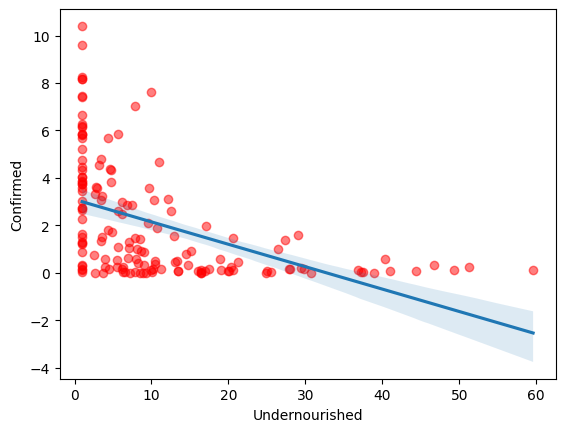



정규성 검정 결과 (Undernourished): Statistic=0.7893, p-value=0.00000000000012983348
정규성 검정 결과 (Deaths): Statistic=0.7873, p-value=0.00000000000011030987
Levene 등분산성 검정 결과 (Deaths): Statistic=114.3234, p-value=0.00000000000000000000
Fligner 등분산성 검정 결과 (Deaths): Statistic=189.4837, p-value=0.00000000000000000000
Spearman 검정 결과 (Deaths): 상관계수=-0.5689, p-value=0.00000000000001384265


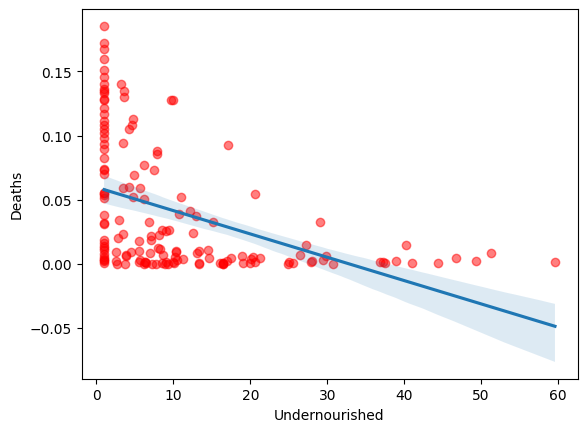



정규성 검정 결과 (Undernourished): Statistic=0.7893, p-value=0.00000000000012983348
정규성 검정 결과 (Active): Statistic=0.4380, p-value=0.00000000000000000000
Levene 등분산성 검정 결과 (Active): Statistic=99.0013, p-value=0.00000000000000000002
Fligner 등분산성 검정 결과 (Active): Statistic=159.4200, p-value=0.00000000000000000000
Spearman 검정 결과 (Active): 상관계수=-0.5488, p-value=0.00000000000017284293


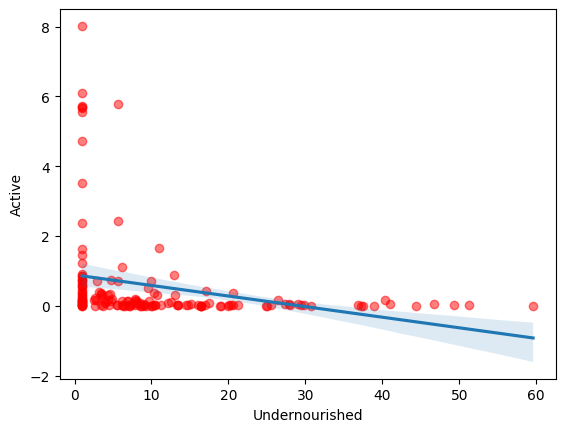

In [13]:
from scipy.stats import shapiro, levene, spearmanr, pearsonr, fligner
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

cols = ['Confirmed', 'Deaths', 'Active']

dependent_variable = 'Undernourished'

for col in cols:
    # 데이터 추출 (food 데이터프레임이 정의되어 있다고 가정)
    a = food[dependent_variable]
    b = food[col]
    
    # 정규성 검정
    stat_a, p_a = shapiro(a)
    stat_b, p_b = shapiro(b)

    print(f'정규성 검정 결과 ({dependent_variable}): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
    print(f'정규성 검정 결과 ({col}): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

    # 등분산성 검정 - Levene
    stat_levene, p_value_levene = levene(a, b)
    print(f'Levene 등분산성 검정 결과 ({col}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 등분산성 검정 - Fligner
    stat_fligner, p_value_fligner = fligner(a, b)
    print(f'Fligner 등분산성 검정 결과 ({col}): Statistic={stat_fligner:.4f}, p-value={p_value_fligner:.20f}')

    # 스피어만 검정 또는 피어슨 검정 선택
    if p_a < 0.05 or p_b < 0.05 or stat_levene < 0.05 or stat_fligner < 0.05:  # 정규성 또는 등분산성 가정이 깨질 경우 스피어만 검정 수행
        correlation, p_value = spearmanr(a, b)
        print(f'Spearman 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')
    else:
        correlation, p_value = pearsonr(a, b)
        print(f'Pearson 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')

    # 절대값이 0.3보다 클 경우 스캐터플롯 출력
    if abs(correlation) > 0.5:
        sns.regplot(x=a, y=b, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(dependent_variable)
        plt.ylabel(col)
        plt.show()

    print("\n")